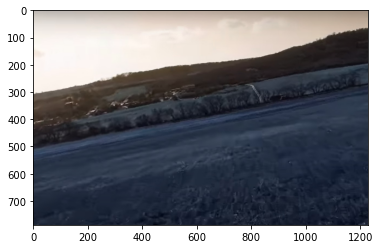

In [71]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

# read image
img = cv2.imread('img2.jpg', cv2.COLOR_RGB2BGR)
plt.imshow(img)

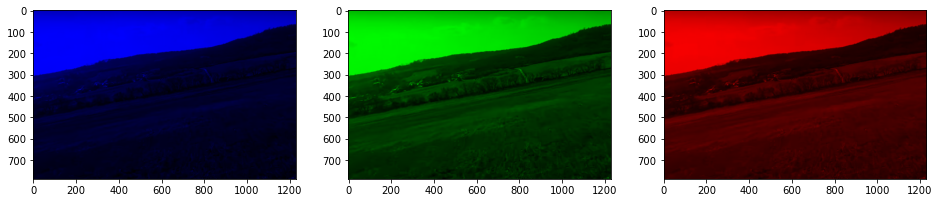

In [72]:
# get RGB channels
blue, green, red = cv2.split(img)
zeros = np.zeros(blue.shape, np.uint8)

blueBGR = cv2.merge((zeros, zeros, blue))
greenBGR = cv2.merge((zeros, green, zeros))
redBGR = cv2.merge((red, zeros, zeros))

f, axes = plt.subplots(1, 3, figsize=(16, 9)) 
axes[0].imshow(blueBGR)
axes[1].imshow(greenBGR)
axes[2].imshow(redBGR)

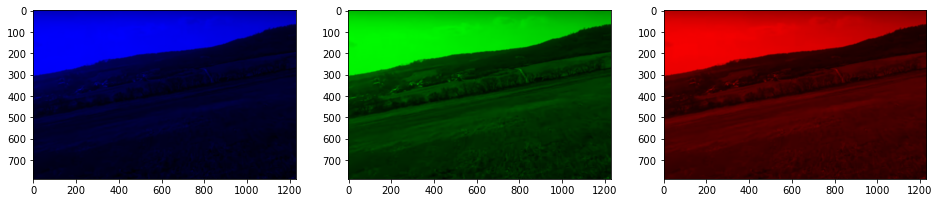

In [73]:
# gaussian smoothing
blueBGR_g = cv2.GaussianBlur(blueBGR, (5, 5), cv2.BORDER_DEFAULT)
greenBGR_g = cv2.GaussianBlur(greenBGR, (5, 5), cv2.BORDER_DEFAULT)
redBGR_g = cv2.GaussianBlur(redBGR, (5, 5), cv2.BORDER_DEFAULT)

f, axes = plt.subplots(1, 3, figsize=(16, 9)) 
axes[0].imshow(blueBGR_g)
axes[1].imshow(greenBGR_g)
axes[2].imshow(redBGR_g)

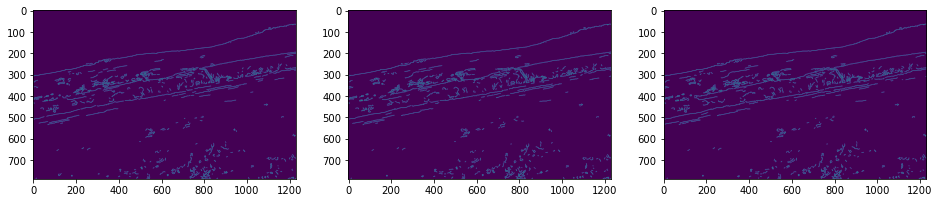

In [74]:
# edge detection (canny)
blueBGR_c = cv2.Canny(blueBGR_g, 30, 40)
greenBGR_c = cv2.Canny(greenBGR_g, 30, 40)
redBGR_c = cv2.Canny(redBGR_g, 30, 40)

f, axes = plt.subplots(1, 3, figsize=(16, 9)) 
axes[0].imshow(blueBGR_c)
axes[1].imshow(greenBGR_c)
axes[2].imshow(redBGR_c)

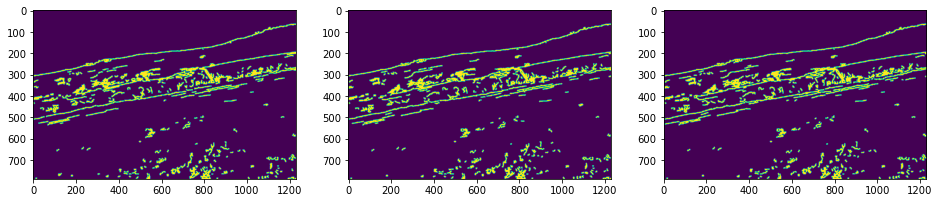

In [75]:
# dilation
blueBGR_d = cv2.dilate(blueBGR_c, np.ones((5, 5), np.uint8), iterations = 1)
greenBGR_d = cv2.dilate(greenBGR_c, np.ones((5, 5), np.uint8), iterations = 1)
redBGR_d = cv2.dilate(redBGR_c, np.ones((5, 5), np.uint8), iterations = 1)

f, axes = plt.subplots(1, 3, figsize=(16, 9)) 
axes[0].imshow(blueBGR_d)
axes[1].imshow(greenBGR_d)
axes[2].imshow(redBGR_d)

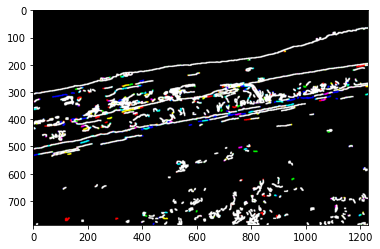

In [76]:
# combine edge detected channels
img2 = cv2.merge((blueBGR_d, greenBGR_d, redBGR_d))
plt.imshow(img2)

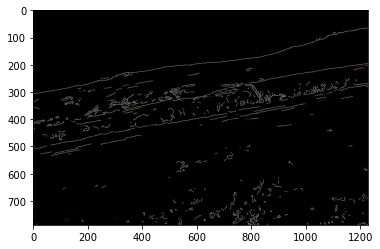

In [77]:
# mask combined with the blue channel
masked = cv2.bitwise_and(img2, img2, mask = blueBGR_c)
plt.imshow(masked)

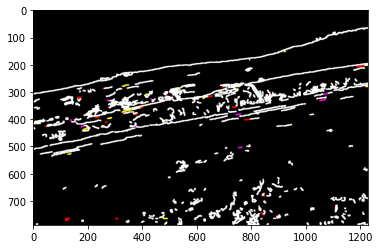

In [78]:
# dilation again
dilated = cv2.dilate(masked, np.ones((5, 5), np.uint8), iterations = 1)
plt.imshow(dilated)

Angle:  1.3729924


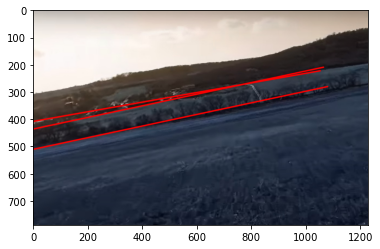

In [79]:
# Hough transform - grayscale before transformation
img = cv2.imread('img2.jpg', cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(dilated, cv2.COLOR_BGR2GRAY)

# Hough transform
for i in range(1500, 0, -50):
    lines = cv2.HoughLines(gray, 1, np.pi/180, i)
    if lines is not None:
        break
        print(lines)

for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
    pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
    cv2.line(img, pt1, pt2, (255, 0, 0), 3, cv2.LINE_AA)

print("Angle: ", (sum(lines)/len(lines))[0][1])
plt.imshow(img)